# An Introduction to Julia
**SUT, Generative Models course, Oct 16**  
Amirabbas Asadi


----


We create a virtual env for our project

In [48]:
using Pkg
Pkg.activate("JuliaWorkshop")

  Activating project at `/media/amirabbas/gauss/julia_workshop/JuliaWorkshop`


## Hello World

In [49]:
println("Hello World")

Hello World


## Basic Syntax

In [51]:
x = 2

2

In [57]:
α = 5
ζ = 0.1
🐱 = 8.0
🐱 + α

13.0

In [58]:
if x > 5
    println("one")
else
    println("two")
end

two


In [61]:
n = 10
while n > 1
    println("n is $(n)")
    n = n - 1
end

n is 10
n is 9
n is 8
n is 7
n is 6
n is 5
n is 4
n is 3
n is 2


In [ ]:
for i ∈ 1:10, j ∈ 1:5
    println(i, j)
end

In [ ]:
for i ∈ 1:0.1:10
    println(i)
end

In [74]:
x = [1, 2, 4, 5]
x[1:3]

3-element Vector{Int64}:
 1
 2
 4

In [75]:
length(x)

4

In [78]:
A = [1 2 3 4; 1 5 6 7]

2×4 Matrix{Int64}:
 1  2  3  4
 1  5  6  7

In [80]:
B = 2A

2×4 Matrix{Int64}:
 2   4   6   8
 2  10  12  14

In [83]:
C = [1 2 3; 4 5 6; 7 8 9]
C .* C

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

In [86]:
sin.(x)

4-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
 -0.7568024953079282
 -0.9589242746631385

In [95]:
function f1(x)
    z = 4x
    2z
end

function f2(x)
    z = 4x
    return 2z
end

f3(x) = 2x

f4 = x -> 2x

#5 (generic function with 1 method)

## Types and Multiple Dispatch
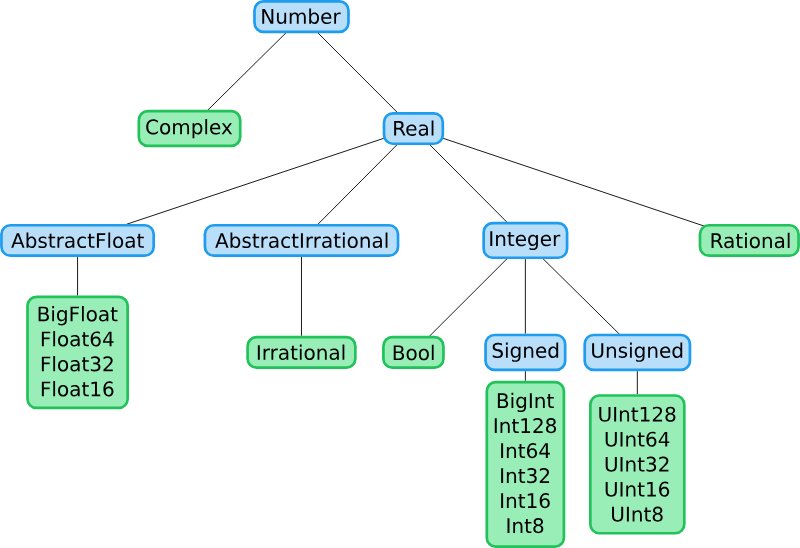

In [111]:
function test_f(x::Number)
    println("general version")
end

function test_f(x::Complex)
    println("specialized version")
end

test_f (generic function with 2 methods)

In [114]:
test_f(4.0 + 1.0im)

specialized version


In [122]:
using LinearAlgebra

A = randn((5,5))
B = A'A

inv(Symmetric(B))

5×5 Symmetric{Float64, Matrix{Float64}}:
  28.3142  17.927    -11.5162   -14.0652    4.7845
  17.927   11.9136    -7.51232   -8.5415    3.00692
 -11.5162  -7.51232    5.62414    5.56433  -2.09534
 -14.0652  -8.5415     5.56433    7.54302  -2.43492
   4.7845   3.00692   -2.09534   -2.43492   1.10028

## Visualization

In [124]:
using Plots

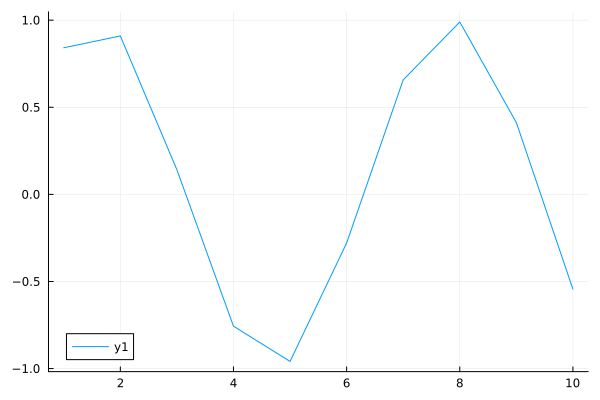

In [126]:
x = collect(1.0:1.0:10.0)
y = sin.(x)

plot(x, y)

[ Info: Saved animation to /media/amirabbas/gauss/julia_workshop/tmp.gif


Plots.AnimatedGif("/media/amirabbas/gauss/julia_workshop/tmp.gif")
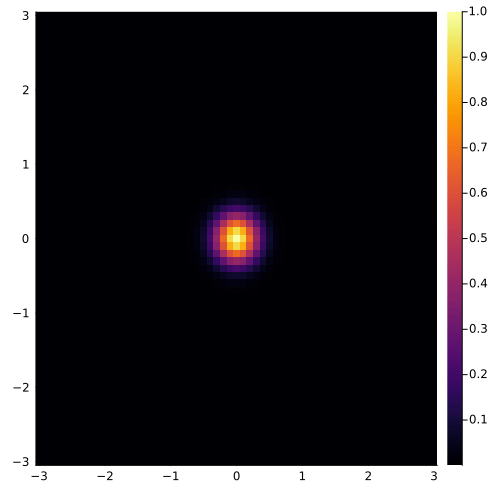

In [133]:
g(x, σ) = exp(-(x[1]^2 + x[2]^2)/σ)

σ_range = 0.1:0.01:1.0

@gif for σ ∈ σ_range
    x = -3.0:0.1:3.0
    y = -3.0:0.1:3.0
    z = zeros(length(y), length(x))
    
    for i ∈ eachindex(x), j ∈ eachindex(y)
        z[j, i] = g([x[i], y[j]], σ)
    end
    
    plot(size=(500, 500))
    heatmap!(x, y, z)
end

## Probability Distributions

In [135]:
using Distributions

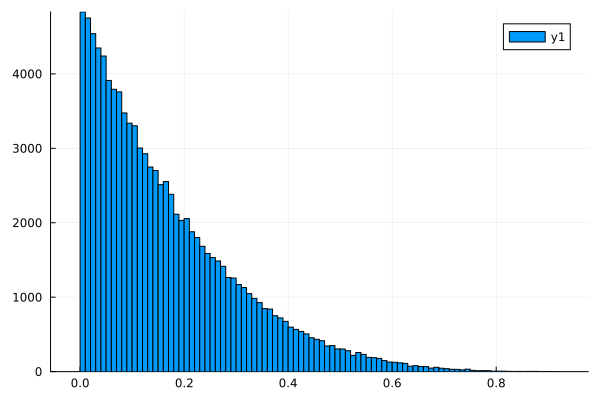

In [169]:
S = rand(Beta(1.0, 5.0), (100000,))
histogram(S)

## Automatic Differentiation

In [174]:
using ForwardDiff

In [171]:
h(x) = sum(x .^ 2)

h (generic function with 1 method)

In [179]:
ForwardDiff.gradient(h, [0.1, 0.1])

2-element Vector{Float64}:
 0.2
 0.2

In [180]:
ForwardDiff.hessian(h, [0.1, 0.1])

2×2 Matrix{Float64}:
 2.0  0.0
 0.0  2.0

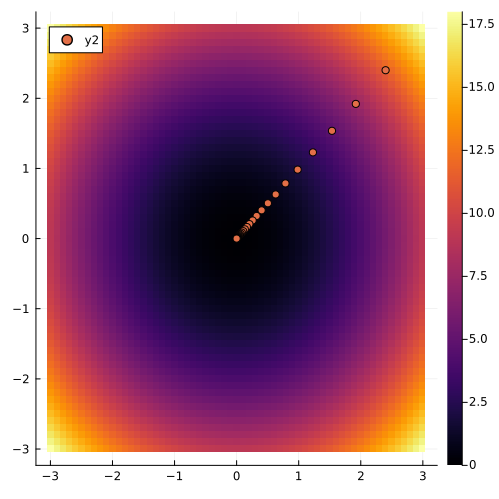

In [186]:
∇h(x) = ForwardDiff.gradient(h, x)
η = 0.1


s = [3.0, 3.0]

path = []

for τ ∈ 1:100
    s = s - η * ∇h(s) 
    push!(path, s)
end

x = -3.0:0.1:3.0
y = -3.0:0.1:3.0
z = zeros(length(y), length(x))

for i ∈ eachindex(x), j ∈ eachindex(y)
    z[j, i] = h([x[i], y[j]])
end

plot(size=(500, 500))
heatmap!(x, y, z)
scatter!(stack(path)[1, :], stack(path)[2, :])


## Optimization

In [187]:
using Optim

In [189]:
result = optimize(h, [3.0, 3.0], LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     5.728179e-23

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.00e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.61e+11 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.80e+01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.14e+23 ≰ 0.0e+00
    |g(x)|                 = 1.07e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   3


In [190]:
Optim.minimizer(result)

2-element Vector{Float64}:
 5.3517190679031046e-12
 5.3517190679031046e-12